In [2]:
# AMS 595 - Python Project 4
## Q5 using Modified Dataset
#!pip install torch torchvision torchaudio
# !!! I had trouble installing torch. Instead I will use the deep learning model: MLP neural network. !!!

# Import packages
import h5py
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
# here we only load the training dataset since we will split the training data into testing and training data.
# we put them into training and testing variables x and y.
with h5py.File("train_catvnoncat.h5", "r") as f:
    X_all = np.array(f["train_set_x"])
    Y_all = np.array(f["train_set_y"])

train_size = 160 + 7   #since my last digit is7, 160 + 7.

# Because we only have training data now, we have to split the training data into training and testing.
X_train = X_all[:train_size]
Y_train = Y_all[:train_size]
X_test  = X_all[train_size:]
Y_test  = Y_all[train_size:]

# Now we do the same thing like we did in the original data.

# Need to flatten and normalize the dataset
X_train = X_train.reshape(len(X_train), -1) / 255.0
X_test  = X_test.reshape(len(X_test), -1) / 255.0

# We initialize and train neural network classifier
model = MLPClassifier(hidden_layer_sizes=(128, 64),
                      activation='relu',
                      solver='adam',
                      max_iter=120,
                      random_state=0)
#fit the model
model.fit(X_train, Y_train)

C:\Users\zhubr\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=120, random_state=0)

Training Accuracy: 0.9820
Test Accuracy: 0.5238

Misclassified Test Indices: [ 0  2  3  4  6  8 10 12 16 18 21 25 28 29 30 31 33 35 37 38]


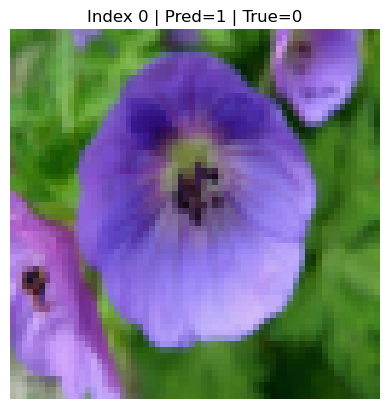

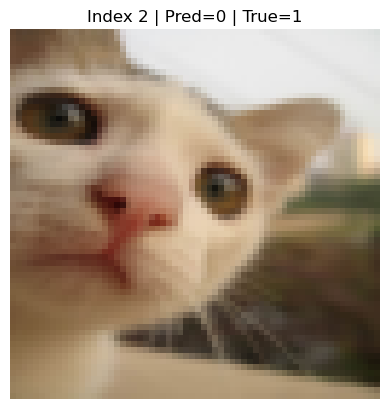

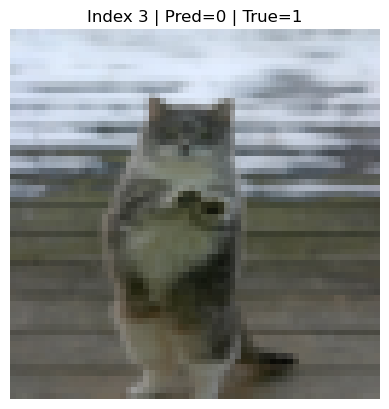

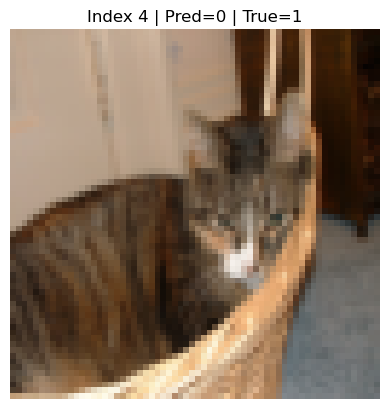

In [4]:
# We evaluate by predicting the model of both training and testing data.
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

# compute the accuracy of both datasets
train_acc = np.mean(pred_train == Y_train)
test_acc = np.mean(pred_test == Y_test)

#Printed accuracy
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Misclassified indices to see which ones were misclassified
mis_idx = np.where(pred_test != Y_test)[0]
print("\nMisclassified Test Indices:", mis_idx)

# Display the 4 misclassified test images that is asked
for i in mis_idx[:4]:
    plt.imshow(X_test[i].reshape(64, 64, 3))
    plt.title(f"Index {i} | Pred={pred_test[i]} | True={Y_test[i]}")
    plt.axis("off")
    plt.show()